In [44]:
import os
import pandas as pd

df = pd.read_csv('Heart Disease.csv')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [46]:
df['HeartDisease'].value_counts()

HeartDisease
0    3594
1     644
Name: count, dtype: int64

In [47]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


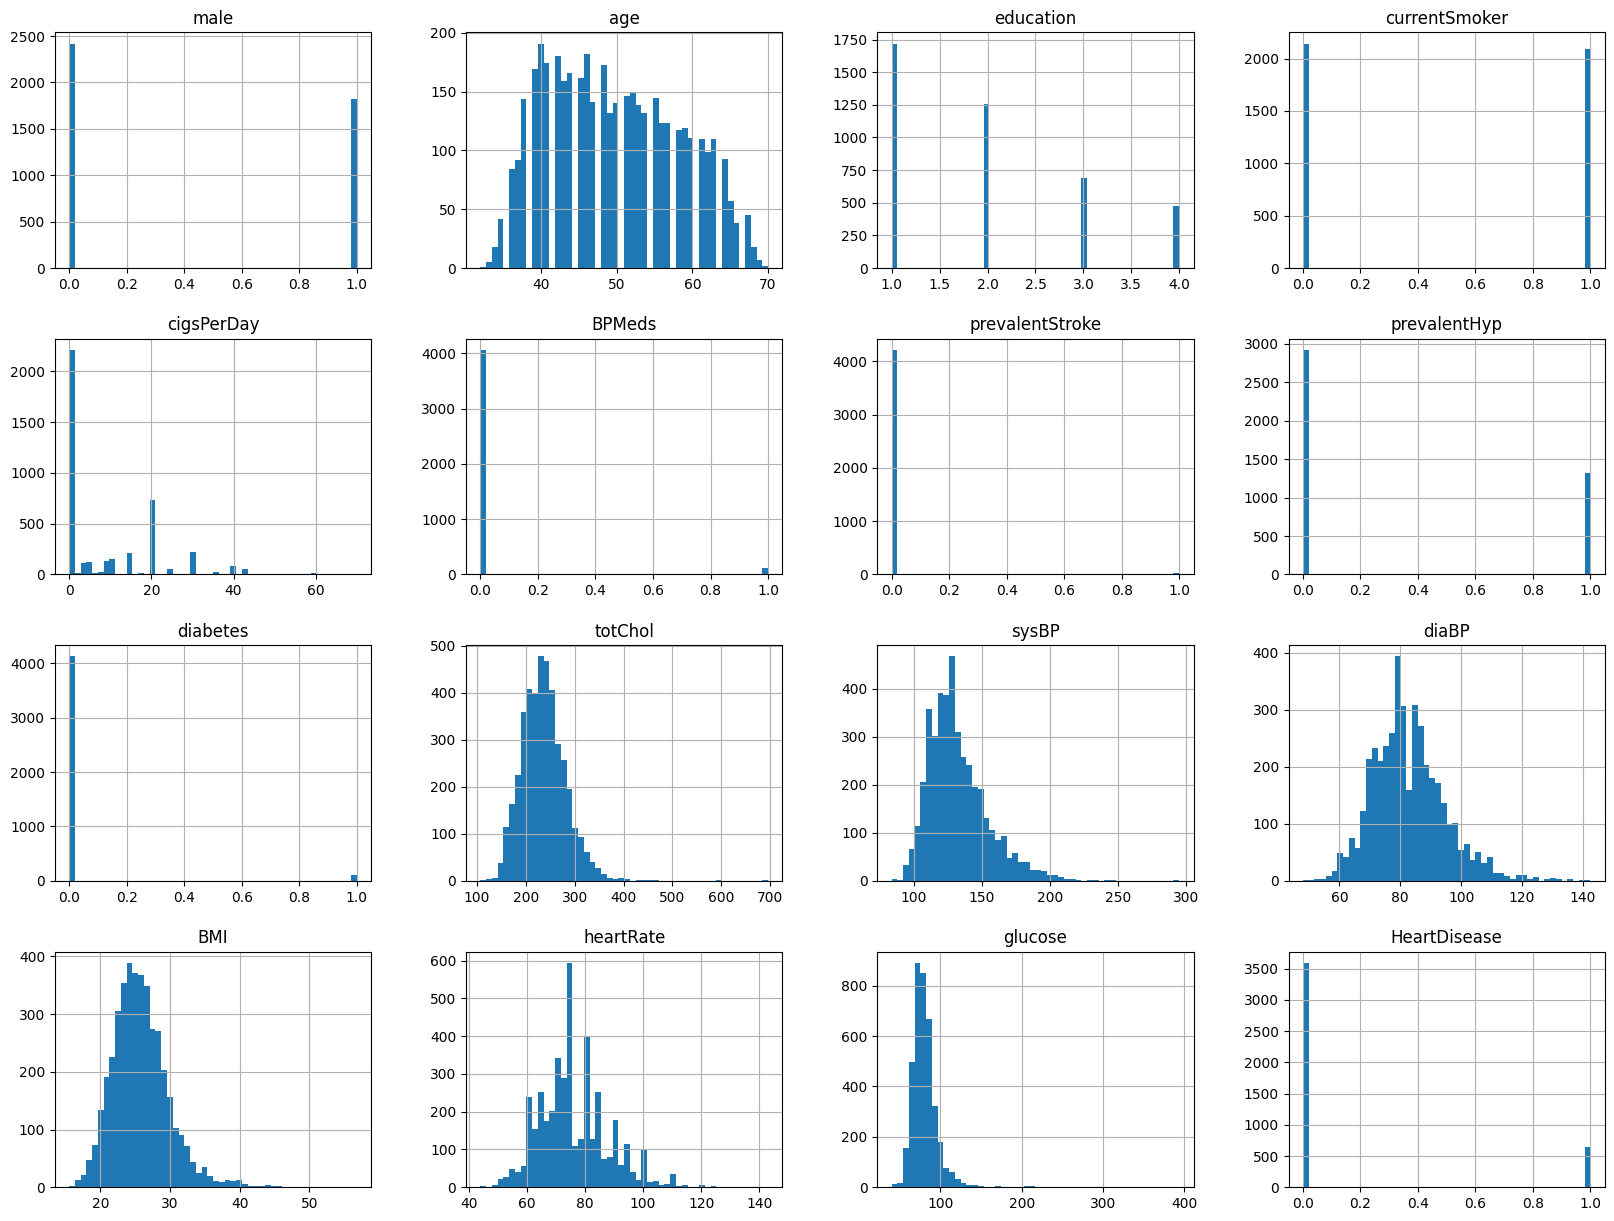

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins =50 , figsize = (20 , 15))
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.15, random_state=42)

# Step 2: Further split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.1765, random_state=42)  # 0.1765 * 0.85 ≈ 0.15 of total

# Now, we have train, validation, and test datasets without overlap
print(len(train_data), len(val_data), len(test_data))


2966 636 636


In [50]:
train_copy = train_data.copy()
print(type(train_copy) , type(train_data))
# train_copy.plot(kind="scatter", x="BMI", y="heartRate")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [51]:
# corr_matrix = train_copy.corr()
# corr_matrix["HeartDisease"].sort_values(ascending =False)
print(type(train_copy))

<class 'pandas.core.frame.DataFrame'>


In [52]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# train_copy.replace("NA", pd.NA, inplace=True)

# imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
# imputer.fit(train_copy)
# imputer.statistics_

In [53]:
# train_copy_transformed_array = imputer.transform(data_train)  # This returns a numpy array
# train_copy_transformed = pd.DataFrame(train_copy_transformed_array, columns=data_train.columns)

In [54]:
# print(train_copy_transformed.head())  # Display the transformed DataFrame

In [55]:
def categorical_indices():
    categorical_columns = []
    vals = [0.0, 1.0]
    
    for column in train_copy.columns:
        is_categorical = True
        unique_values = train_copy[column].unique()
        # print(unique_values)
        
        for val in unique_values:
            # print(val)
            
            # Check if the value is in our list of accepted values
            # or if it's a representation of NA/NaN
            if val not in vals and val != "nan" and not pd.isna(val):
                # print("Val str " , val , vals)
                is_categorical = False
                break
        
        if is_categorical:
            categorical_columns.append(column)
    
    return categorical_columns
    
categorical_columns = categorical_indices()
all_columns = train_copy.columns.tolist()
numeric_columns = [col for col in all_columns if col not in categorical_columns]

        
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

train_copy[numeric_columns] = numeric_imputer.fit_transform(train_copy[numeric_columns])

train_copy[categorical_columns] = categorical_imputer.fit_transform(train_copy[categorical_columns])


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent"))
])

# Combine the numeric and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_columns),
    ('cat', cat_pipeline, categorical_columns)
])

# Create the full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

transformed_data = full_pipeline.fit_transform(train_copy)
transformed_df = pd.DataFrame(transformed_data, columns=numeric_columns + categorical_columns)

In [83]:
x_train = transformed_df.drop(columns=['HeartDisease'])  
y_train = transformed_df['HeartDisease'].values
print(y_train.shape)




(2966,)


In [99]:
#implement LogR from scratch
import numpy as np

def sigmoid(z): 
    return (1/(1+ np.exp(-z)))

def J(A, m , y):
    return -(1/m)* np.sum(y*np.log(A) + (1-y)*np.log(1-A))

def gd(A,x,y,m ):
    dW = (1/m) * np.dot(x.T, (A - y))
    db = (1/m) * np.sum(A - y)  
    return dW , db

def predict(w , b,x):
    z = np.dot(x,(w)) + b
    A = sigmoid(z)
    return (np.where(A > 0.5 , 1.0 ,0.0))


def model(x , y, n_features, alpha):
    
    b = 0
    rows , coloumns = x.shape
    w = np.zeros((n_features , 1))
    print( "w " , w.shape, " "  , x.shape)
    z  = np.dot(x, w) + b
    A = sigmoid(z)
    dw,db = gd(A,x,y, rows)
    i = 0
    while(i < 1000):
        # print(w.shape , " " , x.shape)
        w = w - alpha*dw
        b = b - alpha*db   
        z = np.dot(x,w) + b
        A = sigmoid(z)
        dw,db = gd(A ,x,y , rows)
        if(i%100 ==0):
                print( " after " , i , " iterations , cost  : " , J(A , rows,y))
        i+=1
            
    y_pred = predict(w , b,x)
    accuracy = 1-(abs(y_pred -  y)/rows)
    return accuracy

print(model(x_train, y_train , 15,0.001))

    

w  (15, 1)   (2966, 15)
 after  0  iterations , cost  :  1371.7920510510241
 after  100  iterations , cost  :  1247.4427290999258
 after  200  iterations , cost  :  1227.7926510875084
 after  300  iterations , cost  :  1208.5718823779127
 after  400  iterations , cost  :  1189.784874543513
 after  500  iterations , cost  :  1171.434682202635
 after  600  iterations , cost  :  1153.5229404797499
 after  700  iterations , cost  :  1136.0498687464803
 after  800  iterations , cost  :  1119.0142996631812
 after  900  iterations , cost  :  1102.4137315395674


ValueError: either both or neither of x and y should be given